In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv("Cancer.csv")

df = df.drop(columns=["id", "Unnamed: 32"])


df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [11]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



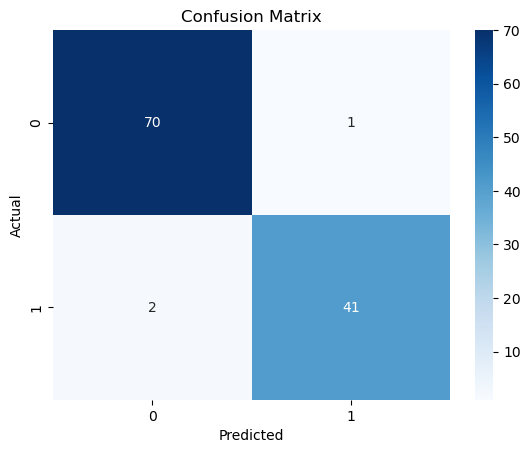

In [13]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


AUC Score: 1.00


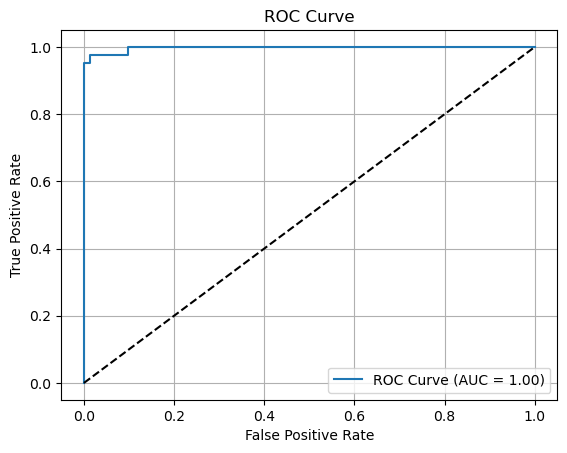

In [14]:
y_probs = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


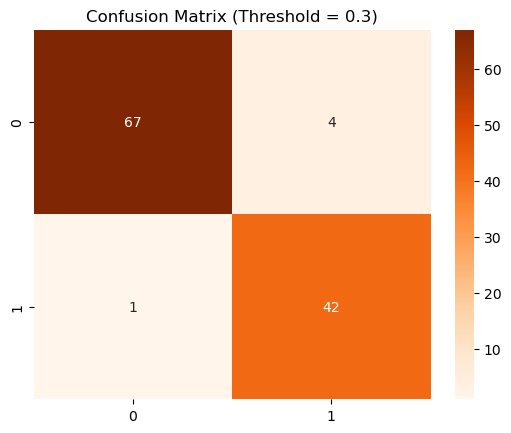

In [15]:

custom_threshold = 0.3
y_pred_custom = (y_probs >= custom_threshold).astype(int)

cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Oranges')
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.show()
